# Linear Regression on Boston Housing Dataset

This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

The description of all the features is given below:

**CRIM**: Per capita crime rate by town

**ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

**INDUS**: Proportion of non-retail business acres per town

**CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

**NOX**: Nitric oxide concentration (parts per 10 million)

**RM**: Average number of rooms per dwelling

**AGE**: Proportion of owner-occupied units built prior to 1940

**DIS**: Weighted distances to five Boston employment centers

**RAD**: Index of accessibility to radial highways

**TAX**: Full-value property tax rate per $10,000

**B**: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

**LSTAT**: Percentage of lower status of the population

**MEDV**: Median value of owner-occupied homes in $1000s

#### Import the required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

%matplotlib inline

#### Load the Dataset using sklearn

In [2]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

# Boston_dataset is a dictionary
# see what it's contains

boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

#### Load the data into pandas dataframe

In [3]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### Adding the target variable to the Boston dataset

In [4]:
boston["MEDV"] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Data Preprocessing

In [5]:
# Check for missing value on all columns
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

#### Data Visualization

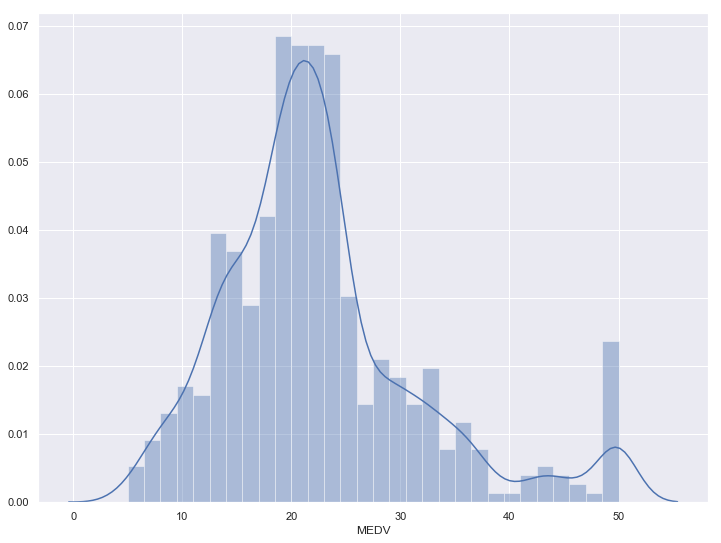

In [6]:
# set the figure size
sns.set(rc={'figure.figsize': (12,9)})

# Plot the histogram showing the distribution of the target values
sns.distplot(boston["MEDV"], bins=30)
plt.show()

#### Correlation matrix

In [7]:
# Pair wise correlation for all columns

correlation_matrix = boston.corr()

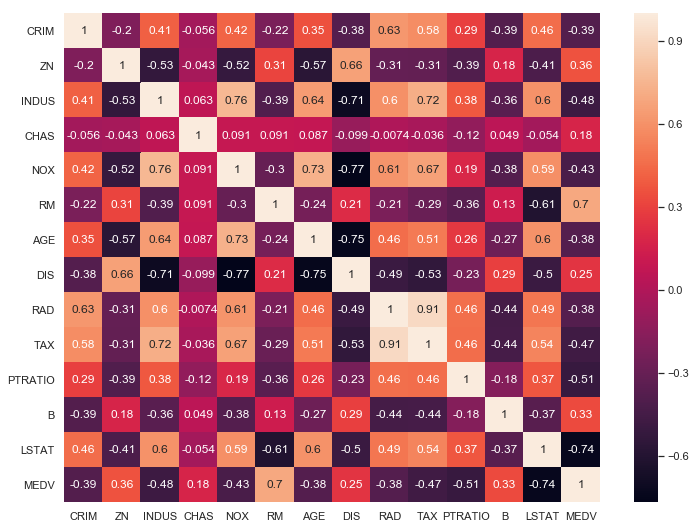

In [8]:
# Heatmap function of the Seaborn to plot the correlation Matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

#### Takeaway

- From heatmap we could see that the variables LSTAT and RM are most correlated variable.
- RAD and TAX are strongly correlated, we need to remove that column moving further

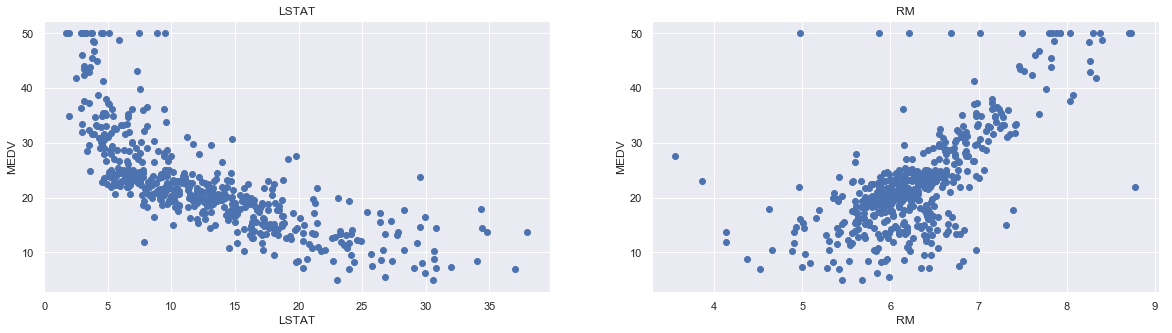

In [9]:
plt.figure(figsize=(20,5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1,len(features),i+1)
    x = boston[col]
    y = target
    plt.scatter(x,y,marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    

#### Prepare the data for training

In [10]:
X = pd.DataFrame(np.c_[boston['LSTAT'],boston['RM']],columns=['LSTAT','RM'])
#sample_x =pd.DataFrame(data=boston,columns=['LSTAT','RM'])
Y = boston['MEDV']

#### Split the dataset into Training and Test Data set

In [11]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


#### Train the model using sklearn LinearRegression

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
# model evaluation for training set

y_train_predict = regressor.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train,y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print("RMSE is {}".format(rmse))
print("R2 Score is {}".format(r2))
print("\n")

# Model evalution on test dataset

y_test_predict = regressor.predict(X_test)

#Root mean of the model

rmse = (np.sqrt(mean_squared_error(Y_test,y_test_predict)))
r2 = r2_score(Y_test,y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 Score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.13740078470291
R2 score is 0.6628996975186954


## Polynomial Regression

We can see that LSTAT doesn't vary exactly in a linear way. Let's apply the Polynomial Regression with degree 2 and test.

To generate the higher order degrees, we use PolyniomialFeatures class from sklearn library.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

def polynomial_regression_model(degree):
    "Create a polynomial Regression Model for the given Degree"
    poly_features = PolynomialFeatures(degree = degree)
    
    # transform the features into Higher degree features
    X_train_poly = poly_features.fit_transform(X_train)
    
    # fit the transformed feature into Linear Regression
    regressor = LinearRegression()
    regressor.fit(X_train_poly, Y_train)
    
    # Predicting on the training dataset
    y_train_predict = regressor.predict(X_train_poly)
    
    # Predicting on the test data
    y_test_predict = regressor.predict(poly_features.fit_transform(X_test))
    
    # Evaluating the model on the train dataset
    rmse_train = np.sqrt(mean_squared_error(Y_train,y_train_predict))
    r2_train = r2_score(Y_train,y_train_predict)
    
    # Evaluating the model on the test dataset
    rmse_test = np.sqrt(mean_squared_error(Y_test,y_test_predict))
    r2_test = r2_score(Y_test,y_test_predict)
    
    print("The model performance for the training set")
    print("-------------------------------------------")
    print("RMSE of the training set is{}".format(rmse_train))
    print("R2 score of training set is {}".format(r2_train))
    
    print("\n")
    
    print("The model performance for the test set")
    print("-------------------------------------------")
    print("RMSE of the test set is{}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_test))   
    

In [18]:
polynomial_regression_model(2)

The model performance for the training set
-------------------------------------------
RMSE of the training set is4.703071027847755
R2 score of training set is 0.7425094297364766


The model performance for the test set
-------------------------------------------
RMSE of the test set is3.7848198845450263
R2 score of test set is 0.8170372495892192


***We can observe that the error has reduced after using polynomial regression as compared to linear regression***

In [20]:
polynomial_regression_model(4)

The model performance for the training set
-------------------------------------------
RMSE of the training set is4.276081212074226
R2 score of training set is 0.7871419186085676


The model performance for the test set
-------------------------------------------
RMSE of the test set is3.8885946020800866
R2 score of test set is 0.8068665116494962
